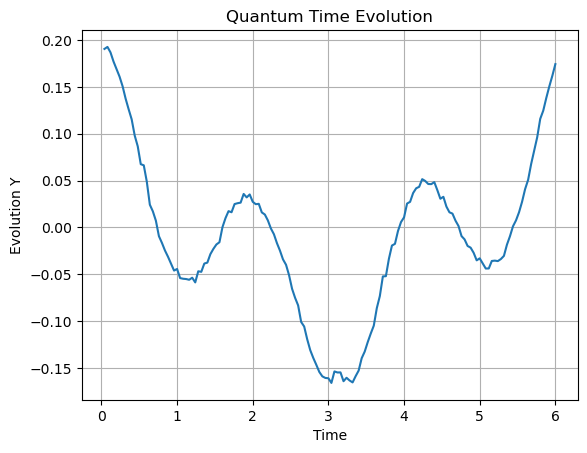

In [24]:
# Problem 2
# 2 A

import json
import numpy as np
import matplotlib.pyplot as plt

with open('ibm_quantum_evolution/ibm_1.0_qubits[2, 1, 3]_Y.json', 'r') as file:
    data = json.load(file)

time = np.array(data['t'])
evolution_y = np.array(data['avg_y'])

ibm_qubit_array = np.column_stack((time, evolution_y))

plt.plot(time, evolution_y)
plt.title("Quantum Time Evolution")
plt.xlabel("Time")
plt.ylabel("Evolution Y")
plt.grid("yes")
plt.show()

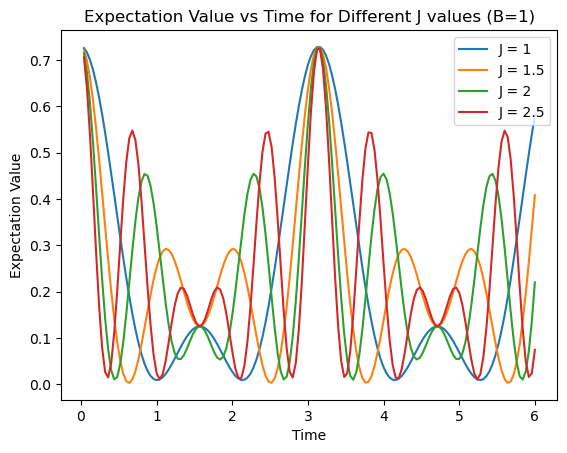

When the value of J becomes larger, it implies that the off-diagonal elements of the Hamiltonian matrix become more significant compared to the diagonal elements. This can lead to a more pronounced interaction between different states in the system.


In [36]:
# 2 B and C
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

J_values = [1, 1.5, 2, 2.5]

B = 1

expectation_values_J = []

for J in J_values:
    H = np.array([[J + 2*B, 0, 0, 0],
                  [0, -1*J, 2*J, 0], 
                  [0, 2*J, -1*J, 0],   
                  [0, 0, 0, J + -1*2*B]])

    eigenvalues, eigenvectors = np.linalg.eig(H)

    psi = np.sum(eigenvectors, axis=1) / 4

    expectation_values = []

    for t in time:
        exp_terms = np.exp(-1j * eigenvalues * t)
        expectation_value = np.abs(np.sum(psi * exp_terms)) ** 2
        expectation_values.append(expectation_value)
    
    expectation_values_J.append(expectation_values)

for i, J in enumerate(J_values):
    plt.plot(time, expectation_values_J[i], label=f'J = {J}')

plt.title("Expectation Value vs Time for Different J values (B=1)")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.show()

print("When the value of J becomes larger, it implies that the off-diagonal elements of the Hamiltonian matrix become more significant compared to the diagonal elements. This can lead to a more pronounced interaction between different states in the system.")